Some code to study the overall RFI stats generated from Jiapeng Zhang's RFI flagging work. It plots the % of times a given frequency bin is flagged, as well as the overall % of band masked for a chosen occurance threshold.

In [32]:
import csv
import matplotlib as mpl
import pylab as plt
import numpy as np

In [17]:
#Read the csv file
rows = []
with open('RFI_for_L.csv', newline='') as csvfile:
    Lband = csv.reader(csvfile, delimiter=',')
    next(Lband)
    for row in Lband:
        row[2] = row[2].replace("\n", "")
        rows.append(row)

In [104]:
#L-band range
Freq_Bins = np.arange(856,1712,1)  #Counting no. of rfi flags every 1 MHz
Occ_Counts = np.zeros(len(Freq_Bins))


In [136]:
BW_total = Freq_Bins[-1]-Freq_Bins[0]
print(BW_total)

855


In [122]:
#Loop through each line (filename), use the histogram function to count the number of flagged freq that falls under each Freq_bin

for i in range(len(rows)):
    filename = rows[i][1]
    tmp = rows[i][2].replace("[", "").replace("]", "").split()
    x = np.array(tmp)
    RFI = x.astype(np.float)
    histo=np.histogram(RFI,bins=np.append(Freq_Bins,Freq_Bins[-1]+1))
    Occ_Counts = Occ_Counts + histo[0]

<ipython-input-122-9a00dd74e1bd>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RFI = x.astype(np.float)


In [126]:
#Figure out % of band flagged for a given threshold
Threshold_Bins = np.arange(0,np.max(Occ_Counts),10)
histo=np.histogram(Occ_Counts,bins=np.append(Threshold_Bins,Threshold_Bins[-1]+10))

#Use the cumulative sum function to find out the % of band masked. need to flip the array so the sum is correct
Percent_band = histo[0]
Percent_band = np.cumsum(np.flip(Percent_band))

(0.0, 100.0)

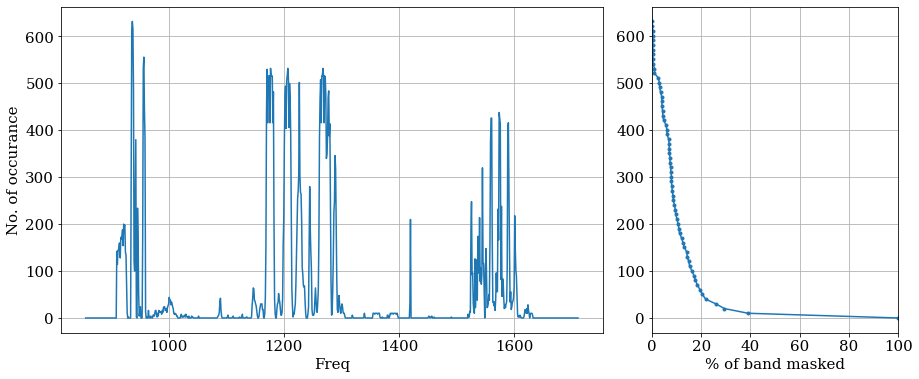

In [144]:
fig = plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.2)
mpl.rcParams.update({'font.size': 15,'font.family': 'serif'})



ax = plt.subplot2grid((1,3),(0,0), rowspan=1,colspan=2)
ax.plot(Freq_Bins,Occ_Counts)
ax.set_ylabel("No. of occurance")
ax.set_xlabel("Freq")
ax.grid()


ax2 = plt.subplot2grid((1,3),(0,2), rowspan=1,colspan=1)
ax2.plot(np.flip(Percent_band)/BW_total*100,Threshold_Bins,marker="o",markersize=3)
ax2.grid()
ax2.set_xlabel("% of band masked")
ax2.set_xlim(0,100)

In [146]:
print(RFI)

[ 935.62304688  935.83203125  936.04101562  936.25        936.45898438
  936.66796875  936.87695312  937.0859375   937.29492188  937.50390625
  937.71289062  937.921875    938.13085938  938.33984375  938.54882812
  938.7578125   938.96679688  939.17578125  939.38476562  939.59375
  942.51953125  942.72851562  943.35546875  943.56445312  944.609375
  946.49023438  946.69921875  947.32617188  947.53515625  955.89453125
  956.10351562  956.3125      956.52148438  956.73046875  956.93945312
  957.1484375   957.35742188  957.56640625  957.77539062  957.984375
  958.19335938  958.40234375  958.61132812  958.8203125   959.02929688
  959.23828125  959.44726562 1146.90625    1147.53320312 1147.7421875
 1148.16015625 1148.36914062 1148.578125   1168.640625   1168.84960938
 1169.05859375 1169.26757812 1169.4765625  1169.68554688 1169.89453125
 1170.10351562 1170.3125     1170.52148438 1170.73046875 1170.93945312
 1171.1484375  1171.35742188 1171.56640625 1171.77539062 1171.984375
 1172.19335938 1